### 필요 모듈 import

In [1]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Confusion Matrix Dispaly에 필요한 모듈
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

### 데이터 준비

In [2]:
# (2) 데이터 준비
wine = load_wine()
wine_data = wine.data
wine_label = wine.target

# 데이터 확인
print('shape: ', wine_data.shape)
print('keys: ', wine.keys())

# X data
print('feature names: ', wine.feature_names)
print('first data: ', wine_data[0])

# y data
print('target names: ', wine.target_names)
print('labels: ', wine_label)

shape:  (178, 13)
keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
feature names:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
first data:  [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
target names:  ['class_0' 'class_1' 'class_2']
labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### 학습(train), 평가(test) 데이터 분리

In [3]:
# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label,
                                                    test_size=0.2, 
                                                    random_state=7)

### Machine Learning 모델 학습 및 예측

#### (1) Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

[[ 7  0  0]
 [ 0 17  0]
 [ 0  2 10]]


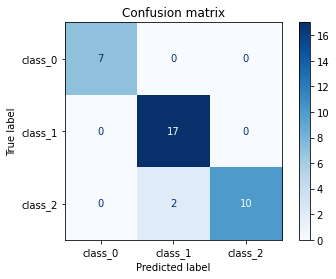

In [4]:
# (4) 모델 학습 및 예측
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix 그리기

clf = decision_tree
disp_labels = wine.target_names

title = "Confusion matrix"
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, 
                                             display_labels=disp_labels, cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(confusion_matrix(y_test, y_pred))

#### (2) Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[ 7  0  0]
 [ 0 17  0]
 [ 0  0 12]]


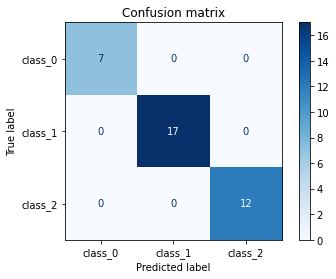

In [5]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix 그리기

clf = random_forest
disp_labels = wine.target_names

title = "Confusion matrix"
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, 
                                             display_labels=disp_labels, cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(confusion_matrix(y_test, y_pred))

#### (3) Support Vector Machine (SVM)

from sklearn.svm import SVC  
model = SVC(kernel='linear', C=1e10).fit(X, y)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36

[[ 6  0  1]
 [ 1 15  1]
 [ 0 11  1]]


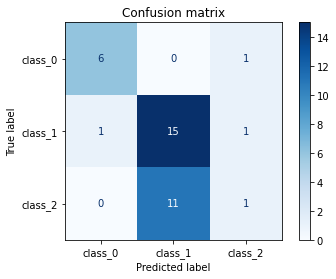

In [6]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix 그리기

clf = svm_model
disp_labels = wine.target_names

title = "Confusion matrix"
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, 
                                             display_labels=disp_labels, cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(confusion_matrix(y_test, y_pred))

#### (4) Stochastic Gradient Descent Classifier (SGDClassifier)

              precision    recall  f1-score   support

           0       0.32      1.00      0.48         7
           1       0.79      0.65      0.71        17
           2       0.00      0.00      0.00        12

    accuracy                           0.50        36
   macro avg       0.37      0.55      0.40        36
weighted avg       0.43      0.50      0.43        36

[[ 7  0  0]
 [ 6 11  0]
 [ 9  3  0]]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


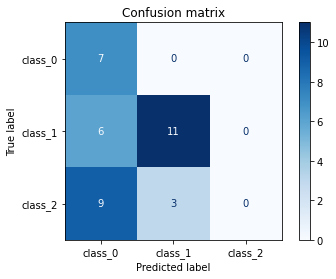

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix 그리기

clf = sgd_model
disp_labels = wine.target_names

title = "Confusion matrix"
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, 
                                             display_labels=disp_labels, cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(confusion_matrix(y_test, y_pred))

#### (5) Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

[[ 7  0  0]
 [ 0 17  0]
 [ 0  1 11]]


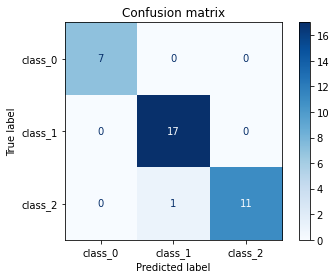

In [8]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix 그리기

clf = logistic_model
disp_labels = wine.target_names

title = "Confusion matrix"
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, 
                                             display_labels=disp_labels, cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(confusion_matrix(y_test, y_pred))

#### 정확도 결과  
(1) Decision Tree : 94%  
(2) Random Forest: 100%  
(3) SVM: 61%  
(4) SGD Classifier: 56%  
(5) Logistics Regression: 97%  

#### 해석
- 13가지의 화학적 특성에 따라 와인을 분류하는 문제이므로 적절한 척도로는 정확도(accuracy)를 들 수 있음  
    (The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators.  
    There are thirteen different measurements taken for different constituents found in the three types of wine.)  
  
  
- Random Forest가 제일 좋은 결과를 보임 (학습 데이터 수가 너무 적어서...)   
- 또한 0~2까지 모든 계급에 대해서도 제일 높은 정밀도(precision), 재현율(recall) 값을 보임 
